# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None,None,None,None
1486,693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,11,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
rq = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
rq.status_code

200

In [6]:
content = rq.content.decode('utf-8')
lines = content.split('\n')
data = [line.split('\t') for line in lines]
image_predictions = pd.DataFrame(data[1:], columns=data[0])

In [7]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.49078299999999997,True,wire-haired_fox_terrier,0.0835133,True,English_setter,0.0831843,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.35506,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.0998837,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# This helper code has been provided by a Udacity instructor. However, Twitter will not give me enough access, so I will use 
# the tweet_json.txt file provided by Udacity. I have commented out this code cell so it won't erroneously execute.
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# Load tweet_json.txt into a dataframe. Use code provided by instructor in Knowledge, as the JSON file fails to load with
# pandas read_csv and read_json methods.
tweet_json = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as df:
    for line in df:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_json = tweet_json.reset_index(drop=True)
tweet_json.sample(2)

,tweet_id,retweet_count,favorite_count
649,792883833364439040,4964,12666
2125,670319130621435904,1359,4110


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.0161992,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279399999999995,True,fur_coat,0.0544486,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.08208610000000001,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id    2076 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.7+ KB


In [18]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
tweet_json.sample(2)

,tweet_id,retweet_count,favorite_count
347,831670449226514432,2059,11469
1540,689599056876867584,6265,12795


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


### Quality issues
1. (Programatic) twitter_archive.timestamp needs converted from object class to datetime class. This can make it easier to order by date to remove rows from after August 1st, 2017. Then drop these rows from the dataframe as there are no pictures avaiable for them.

2. (Visual) The columns twitter_archive named in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp all have very few non-null values. These need to be excluded for ease of visual inspection, as they will likely not be needed in analysis and missing values cannot be replaced or located.

3. (Programatic) In image_predictions, p1_conf, p2_conf and p3_conf all are of type object. These should be converted to type float in order to do calculations or visualizations.

4. (Visual) After data type conversion to float, the raw values of the same column image_predictions (p1_conf, p2_conf and p3_conf) should be rounded for ease of visual inspection and calculation. I will assume 5 significant figures are adequate for the confidence interval values, as this is a common convention in high-precision scientific calculations. This will be balanced by giving enough decimal places to the very small numbers.

5. (Programatic) In tweet_json, all the categories are of type object. These will need made type int before they can be merged with the twitter_archive table. This will also enable insights based on the retweet and favorited counts.

6. (Programatic) In image_predictions, tweet_id and img_num is listed as data type object. The former should be changed to enable mering with twitter_archive and the latter should be changed since it is a numerical value to categorize the picture order.

7. (Programatic and Visual) In twitter_archive.rating_denominator, most values are 10, but several are from values that are not 10, with some values all the way up to 170! Given the rating system is given as "X out of 10" as a score for the tweets, the denominator shluld be reset to 10 in every row.

8. (Programatic and Visual) In twitter_archive.rating_numerator, most of the values for the numerators are from 10 to 13. However, there a good handful of values (including 0) that are present. Using an approach like a loop to add 10 to these less-than-10 values will be used to bring the values up to polling expectation. I am assuming that the value is meant to be "10 + X" of the given value, but this is my best common-sense guess only. Lastly, there are some values that have large vlues, but these will be left alone, as I have no insight into their truthfulness. Some of the highest values, such as 1776, are rare and can be ignored and handled during visualization if needed.

### Tidiness issues

1. (Visual and Programatic) tweet_json and image_predictions should be able to be merged with twitter_archive into a master dataset for ease of use. The tweet_id is common to all three sets and can serve as a primary key for the merger.

2. (Visual) "Doggo," "Floofer," "Pupper" and "Puppo" in twitter_archive can be merged into a single category called dog_stages. It may be necessary to add "None" or "N/A" to this due to lacking another designation from the dataset. The melt function will be considered for this exercise.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issues #5 and 6:

#### Define: Convert all categories in tweet_json and tweet_id and img_num in image_predictions to type int.

#### Code

In [22]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.tweet_id.str.isnumeric()]
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(int)
image_predictions_clean = image_predictions_clean[image_predictions_clean.img_num.str.isnumeric()]
image_predictions_clean.img_num = image_predictions_clean.img_num.astype(int)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(int)
tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.astype(int)
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)

#### Test

In [23]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: int64(2), object(10)
memory usage: 210.7+ KB


In [24]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidiness Issue #1:

#### Define: Merge all 3 datasets into a master clean dataset using the join function.

#### Code

In [26]:
twitter_archive_merged = twitter_archive_clean.join(tweet_json_clean, how = "outer", lsuffix= "", rsuffix="_right")
twitter_archive_merged = twitter_archive_merged.drop(["tweet_id_right"], axis = 1)
twitter_archive_master = twitter_archive_merged.join(image_predictions_clean, how = "outer", lsuffix= "", rsuffix="_right")
twitter_archive_master = twitter_archive_master.drop(["tweet_id_right"], axis = 1)
twitter_archive_master.img_num = twitter_archive_master.img_num.fillna(0).astype(int)

#### Test

In [27]:
twitter_archive_master.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
825,769695466921623552,NaN,NaN,2016-08-28 00:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769695466...,...,1,golden_retriever,0.989333,True,Labrador_retriever,0.00794644,True,kuvasz,0.000748932,True
1255,710609963652087808,NaN,NaN,2016-03-17 23:33:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I've watched this a million times and you prob...,NaN,NaN,NaN,https://vine.co/v/idaTpwH5TgU,...,1,borzoi,0.5964550000000001,True,whippet,0.23142800000000002,True,Saluki,0.058261400000000005,True


In [28]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

### Quality Issue #1:

#### Define: Convert twitter_archive_master.timestamp to datatype datetime. Then remove rows from after August 1st, 2017 from the active dataframe, since picture data is unavailable for these latter dates.

#### Code

In [29]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

#### Test

In [30]:
twitter_archive_master.timestamp.dtype

dtype('<M8[ns]')

### Quality Issue #2:

#### Define: Exclude (drop) in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from dataset.

#### Code

In [31]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [32]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Quality Issue #3:

#### Define: Change p1_conf, p2_conf and p3_conf from type object to type float.

#### Code

In [33]:
twitter_archive_master.p1_conf = twitter_archive_master.p1_conf.fillna(0).astype(float)
twitter_archive_master.p2_conf = twitter_archive_master.p2_conf.fillna(0).astype(float)
twitter_archive_master.p3_conf = twitter_archive_master.p3_conf.fillna(0).astype(float)

#### Test

In [34]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
jpg_url               2075 non-null object
img_num               2356 non-null int64
p1                    2075 non-null object
p1_conf               2356 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2356

### Quality Issue #4:

#### Define: Round p1_conf, p2_conf and p3_conf to 5 decimal places.

#### Code

In [35]:
twitter_archive_master['p1_conf'] = twitter_archive_master['p1_conf'].round(5)
twitter_archive_master['p2_conf'] = twitter_archive_master['p2_conf'].round(5)
twitter_archive_master['p3_conf'] = twitter_archive_master['p3_conf'].round(5)

#### Test

In [36]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
409,823333489516937216,2017-01-23 00:56:15,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,13,10,None,None,None,...,1,suit,0.40412,False,bow_tie,0.29468,False,Windsor_tie,0.13270,False
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,...,1,curly-coated_retriever,0.32208,True,giant_schnauzer,0.28796,True,Labrador_retriever,0.16633,True
703,785927819176054784,2016-10-11 19:39:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's strives to be the best pot...,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,None,None,...,1,shopping_cart,0.46095,False,chow,0.26129,True,Labrador_retriever,0.07419,True


### Quality Issue #7:

#### Define: Change twitter_archive_master.rating_denominator to have all rows observations to be equal to 10.

#### Code

In [37]:
twitter_archive_master.rating_denominator = 10

#### Test

In [38]:
twitter_archive_master.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Quality Issue #8:

#### Define: Write a loop to check over all observations within twitter_archive_master.rating_numerator and see whether the integer values are greater than or equal to 10. If not, the loop will add 10.

#### Code

In [39]:
for i, j in twitter_archive_master.iterrows():
    if j['rating_numerator'] < 10:
        twitter_archive_master.at[i, 'rating_numerator'] += 10

#### Test

In [40]:
twitter_archive_master[twitter_archive_master.rating_numerator <10].count().sum()

0

In [41]:
# Alternatively,
twitter_archive_master.rating_numerator.value_counts()

12      567
11      473
10      463
13      370
19      158
18      102
14       71
17       56
15       39
16       32
75        2
420       2
84        1
20        1
24        1
26        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Tidiness Issue #2:

#### Define: Use the extract, drop and fillna funtions to combine "Doggo," "Floofer," "Pupper" and "Puppo" into a single column called Nickname. Add "None" (as a string) if none of these apply.

#### Code

In [42]:
#The first two lines of code are adapted from an instructor answer in Knowledge. According to them, the melt function is not an effiecient option.
twitter_archive_master['dog_stages'] = twitter_archive_master.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_archive_master.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)
twitter_archive_master['dog_stages'] = twitter_archive_master['dog_stages'].fillna("None")

#### Test

In [43]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
761,778286810187399168,2016-09-20 17:36:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,3065.0,9417.0,...,hog,0.67000,False,guinea_pig,0.07735,False,hamster,0.0624,False,None
1583,687102708889812993,2016-01-13 02:43:46,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,https://twitter.com/dog_rates/status/687102708...,15,10,None,3582.0,9433.0,...,Cardigan,0.83913,True,Boston_bull,0.08070,True,Pembroke,0.0345,True,None
2239,667937095915278337,2015-11-21 05:26:27,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,https://twitter.com/dog_rates/status/667937095...,13,10,None,59.0,222.0,...,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,0.0000,NaN,None


In [44]:
twitter_archive_master.dog_stages.value_counts()

None       1957
pupper      265
doggo        93
puppo        37
floofer       4
Name: dog_stages, dtype: int64

In [45]:
twitter_archive_master.dog_stages.isna().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Exploratory Data Analysis

In [47]:
# Visually inspect the dataset for inspiration for insights.
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
1952,673680198160809984,2015-12-07 01:47:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,265.0,769.0,...,Eskimo_dog,0.41333,True,malamute,0.34765,True,Siberian_husky,0.14954,True,None
1136,728387165835677696,2016-05-06 00:53:27,"<a href=""http://twitter.com/download/iphone"" r...","This is Enchilada (yes, that's her real name)....",https://twitter.com/dog_rates/status/728387165...,12,10,Enchilada,1872.0,4953.0,...,Pembroke,0.93913,True,Cardigan,0.05434,True,Chihuahua,0.00559,True,None
953,751830394383790080,2016-07-09 17:28:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,3440.0,8699.0,...,collie,0.45767,True,chow,0.27910,True,Pomeranian,0.07692,True,None


In [48]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.356000e+03,2356.000000,2356.0,2354.000000,2354.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,7.427716e+17,14.994058,10.0,3164.797366,8080.968564,1.060272,0.523637,0.118536,0.053129
std,6.856705e+16,45.799340,0.0,5284.770364,11814.771334,0.656000,0.319231,0.104058,0.051620
min,6.660209e+17,10.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.783989e+17,11.000000,10.0,624.500000,1415.000000,1.000000,0.273360,0.025045,0.006058
50%,7.196279e+17,12.000000,10.0,1473.500000,3603.500000,1.000000,0.523140,0.101695,0.041290
75%,7.993373e+17,13.000000,10.0,3652.000000,10122.250000,1.000000,0.810823,0.181407,0.085312
max,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,0.488010,0.273420


In [49]:
#The maximum score that doesn't seem abnormally larger for the numerator is 20. Anything greater than that seems to be too high even for this "unique" scoring system.
twitter_archive_master.rating_numerator.nlargest(30)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
340       75
695       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
485       19
784       19
845       19
906       19
946       19
Name: rating_numerator, dtype: int64

In [50]:
# Looking at the relative amount the score values are used, it seems that the score values of 12, 11, 10 and 13 account for about 79% ofall votes.
# This seems to suggest that most of the votes of the votes are more reserved and come form these 4 rating values.
# 99% of all of the values are less than 20.
twitter_archive_master.rating_numerator.value_counts(normalize = True)

12      0.240662
11      0.200764
10      0.196520
13      0.157046
19      0.067063
18      0.043294
14      0.030136
17      0.023769
15      0.016553
16      0.013582
75      0.000849
420     0.000849
84      0.000424
20      0.000424
24      0.000424
26      0.000424
44      0.000424
50      0.000424
60      0.000424
80      0.000424
165     0.000424
88      0.000424
144     0.000424
182     0.000424
143     0.000424
666     0.000424
960     0.000424
1776    0.000424
27      0.000424
45      0.000424
99      0.000424
121     0.000424
204     0.000424
Name: rating_numerator, dtype: float64

In [51]:
twitter_archive_master.p1.value_counts(normalize = True)

golden_retriever             0.072289
Labrador_retriever           0.048193
Pembroke                     0.042892
Chihuahua                    0.040000
pug                          0.027470
chow                         0.021205
Samoyed                      0.020723
toy_poodle                   0.018795
Pomeranian                   0.018313
malamute                     0.014458
cocker_spaniel               0.014458
French_bulldog               0.012530
Chesapeake_Bay_retriever     0.011084
miniature_pinscher           0.011084
seat_belt                    0.010602
Siberian_husky               0.009639
German_shepherd              0.009639
Staffordshire_bullterrier    0.009639
web_site                     0.009157
Cardigan                     0.009157
beagle                       0.008675
teddy                        0.008675
Eskimo_dog                   0.008675
Maltese_dog                  0.008675
Shetland_sheepdog            0.008675
Shih-Tzu                     0.008193
Rottweiler  

In [52]:
twitter_archive_master.p2.value_counts(normalize = True)

Labrador_retriever                0.050120
golden_retriever                  0.044337
Cardigan                          0.035181
Chihuahua                         0.021205
Pomeranian                        0.020241
French_bulldog                    0.019759
Chesapeake_Bay_retriever          0.019759
toy_poodle                        0.017831
cocker_spaniel                    0.016386
Siberian_husky                    0.015904
miniature_poodle                  0.015904
beagle                            0.013494
Eskimo_dog                        0.013012
collie                            0.013012
Pembroke                          0.013012
kuvasz                            0.012530
Italian_greyhound                 0.010602
American_Staffordshire_terrier    0.010120
Pekinese                          0.010120
Samoyed                           0.009639
malinois                          0.009639
toy_terrier                       0.009639
miniature_pinscher                0.009639
chow       

In [53]:
twitter_archive_master.p3.value_counts(normalize = True)

Labrador_retriever                0.038072
Chihuahua                         0.027952
golden_retriever                  0.023133
Eskimo_dog                        0.018313
kelpie                            0.016867
kuvasz                            0.016386
Staffordshire_bullterrier         0.015422
chow                              0.015422
beagle                            0.014940
cocker_spaniel                    0.014940
toy_poodle                        0.013976
Pomeranian                        0.013976
Pekinese                          0.013976
Chesapeake_Bay_retriever          0.013012
Pembroke                          0.013012
Great_Pyrenees                    0.013012
French_bulldog                    0.012530
malamute                          0.012530
American_Staffordshire_terrier    0.011566
Cardigan                          0.011084
pug                               0.011084
basenji                           0.010120
toy_terrier                       0.009639
bull_mastif

In [54]:
twitter_archive_master.retweet_count.head(5)

0    8853.0
1    6514.0
2    4328.0
3    8964.0
4    9774.0
Name: retweet_count, dtype: float64

In [55]:
twitter_archive_master.retweet_count.nlargest(5)

1037    79515.0
259     56625.0
533     56625.0
816     52360.0
1077    52360.0
Name: retweet_count, dtype: float64

In [56]:
twitter_archive_master.favorite_count.nlargest(5)

412     132810.0
1037    131075.0
65      107956.0
533     107015.0
134     106827.0
Name: favorite_count, dtype: float64

### Insights:
1. Scores with ranges of 10-13 are the most common, so clearly most voters are reserved in how they vote. These account for 79% of all votes. The mean score according to the describe method seems to be 15/10 across all data points. This, however, is skewed by a handful of large (and possibly erroneous) observation values, so observing the normalized frequency of the 10-13 values may be of greater insight.

2. The most frequent prediction choices for pet tweets are some combination of Golden and Labrador Retrievers and Chihuahuas.

3. According to the scatter plot below, there is a positive correlation between retweet_count and favorite_count, which probably isn't surprising since tweets that re favorited intuitively have higher retweets (shares).

### Visualization

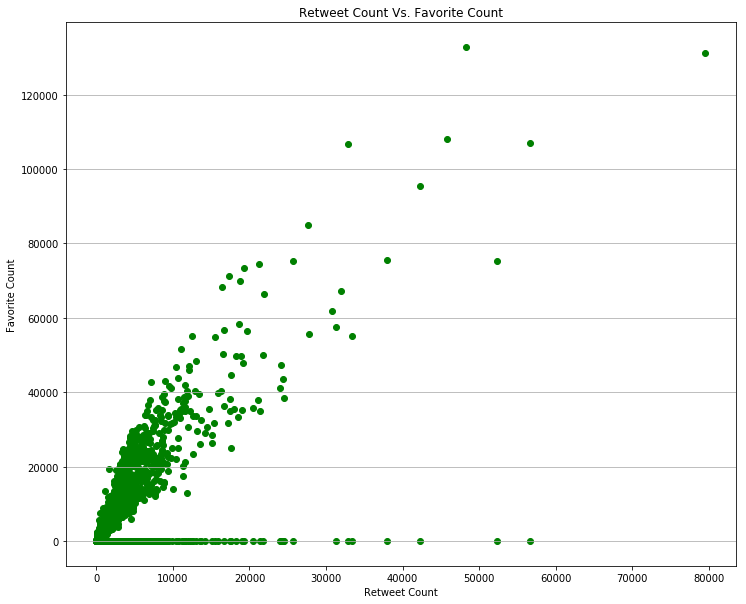

In [57]:
# Bar plot of retweet_count vs. favorite_count. This will be used for Insight 3 (above).
plt.figure(figsize=(12, 10))  # Set the size of the figure

plt.scatter(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count, color='green')  # Plot the bars

plt.title('Retweet Count Vs. Favorite Count')  # Add a title to the plot
plt.xlabel('Retweet Count')  # Add label to X-axis
plt.ylabel('Favorite Count')  # Add label to Y-axis

plt.grid(axis='y')  # Add grid lines on the Y-axis

plt.show()  # Display the plot